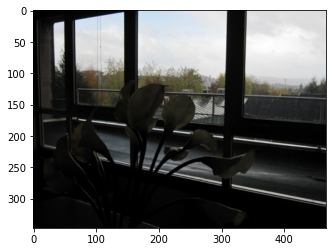

<ipython-input-2-992b67ab355f>:54: ComplexWarning: Casting complex values to real discards the imaginary part
  fft_u_b[i,j]=(((np.pi*(i+1)/J)**2+(np.pi*(j+1)/L)**2)/(lam+(np.pi*(i+1)/J)**2+(np.pi*(j+1)/L)**2))*fft_b[i,j]
<ipython-input-2-992b67ab355f>:55: ComplexWarning: Casting complex values to real discards the imaginary part
  fft_u_g[i,j]=(((np.pi*(i+1)/J)**2+(np.pi*(j+1)/L)**2)/(lam+(np.pi*(i+1)/J)**2+(np.pi*(j+1)/L)**2))*fft_g[i,j]
<ipython-input-2-992b67ab355f>:56: ComplexWarning: Casting complex values to real discards the imaginary part
  fft_u_r[i,j]=(((np.pi*(i+1)/J)**2+(np.pi*(j+1)/L)**2)/(lam+(np.pi*(i+1)/J)**2+(np.pi*(j+1)/L)**2))*fft_r[i,j]


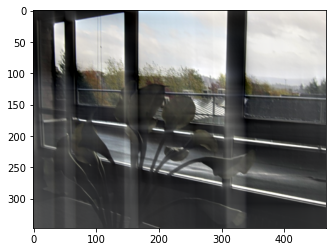

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread('input_1.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

def scb(img):
    pagesize=img.shape[0]*img.shape[1]

    flat_img=img.flatten()
    sort_flat_img=sorted(flat_img)
    lam=np.exp(0.0001)
    s=np.exp(0.2)
    s1=s/2
    s2=s1
    
    pos_v_min=int(pagesize*s1/100)
    pos_v_max=int((pagesize * (1 - (s2/100))) - 1)
    
    v_min=sort_flat_img[pos_v_min]
    v_max=sort_flat_img[pos_v_max]
    
    idx_min=flat_img<v_min
    idx_max=flat_img>v_max
    
    flat_img[idx_min]=v_min
    flat_img[idx_max]=v_max
    for i in range(pagesize):
        flat_img[i]=(flat_img[i]-v_min)*255/(v_max-v_min)
    output=np.reshape(flat_img,img.shape)
    return output

b,g,r=cv2.split(img)
b_scb=scb(b)
g_scb=scb(g)
r_scb=scb(r)
b_prd=np.pad(b_scb,((0,b.shape[0]),(0,b.shape[1])),'symmetric')
g_prd=np.pad(g_scb,((0,b.shape[0]),(0,b.shape[1])),'symmetric')
r_prd=np.pad(r_scb,((0,b.shape[0]),(0,b.shape[1])),'symmetric')

fft_b=np.fft.fft2(b_prd)
fft_g=np.fft.fft2(g_prd)
fft_r=np.fft.fft2(r_prd)

J=b_prd.shape[0]
L=b_prd.shape[1]
fft_u_b,fft_u_g,fft_u_r=np.zeros((J,L)),np.zeros((J,L)),np.zeros((J,L))
lam=np.exp(0.0001)

for i in range(b_prd.shape[0]):
    for j in range(b_prd.shape[1]):
        fft_u_b[i,j]=(((np.pi*(i+1)/J)**2+(np.pi*(j+1)/L)**2)/(lam+(np.pi*(i+1)/J)**2+(np.pi*(j+1)/L)**2))*fft_b[i,j]
        fft_u_g[i,j]=(((np.pi*(i+1)/J)**2+(np.pi*(j+1)/L)**2)/(lam+(np.pi*(i+1)/J)**2+(np.pi*(j+1)/L)**2))*fft_g[i,j]
        fft_u_r[i,j]=(((np.pi*(i+1)/J)**2+(np.pi*(j+1)/L)**2)/(lam+(np.pi*(i+1)/J)**2+(np.pi*(j+1)/L)**2))*fft_r[i,j]
        
u_b=np.real(np.fft.ifft2(fft_u_b))
u_g=np.real(np.fft.ifft2(fft_u_g))
u_r=np.real(np.fft.ifft2(fft_u_r))

  
res_b=scb(u_b[0:img.shape[0],0:img.shape[1]])  
res_g=scb(u_g[0:img.shape[0],0:img.shape[1]])     
res_r=scb(u_r[0:img.shape[0],0:img.shape[1]])  
    
res_img=cv2.merge([res_r,res_g,res_b]).astype(np.int32)

   
plt.imshow(res_img)
plt.show()    